# Virus × Dark Matter Classifier

#### TODO: ADD Description...

### Initialization

Imports

In [199]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Parameters

In [200]:
# random_state = False # Default seed for assuring repeatability on experiments
random_state = 13 # Default seed for assuring repeatability on experiments
is_verbose = 1

path_root = '/home/small_rna_metavir/src'
path_ds = f'{path_root}/ds/virus-dark-matter/ds_virus_dark_matter.tab'

Import data

In [201]:
df_virus_dark_matter = pd.read_table(path_ds)

## EDA

In [13]:
df_virus_dark_matter.head()

,Contigs_ID,Similarity_label,15,16,17,18,19,20,21,22,...,-33,-34,-35,dens15to18,dens20to22,dens25to29,ratiosi_pi,ratio_si,dens18to35,length
0,bN_RKPM44_Contig180_179,viral,-0.285242,-0.285242,-0.285242,-0.285242,-0.260587,0.027052,5.467541,0.290036,...,-0.285242,-0.285242,-0.285242,-16.609640,2.159199,-1.889817,4.049016,0.431799,2.380272,315
1,bN_RKPM44_Contig18_17,viral,-0.338402,-0.338402,-0.338402,-0.338402,-0.305252,-0.156079,4.761109,0.258290,...,-0.321827,-0.327352,-0.327352,-16.609640,2.051209,-0.388975,2.440184,0.008159,2.500344,512
2,bN_RKPM44_Contig1_0,viral,-0.402533,-0.402533,-0.402533,-0.402533,-0.371450,-0.196612,5.386557,0.553250,...,-0.379221,-0.336483,-0.355909,-16.609640,2.379971,0.741514,1.638457,0.602814,3.072798,570
3,bN_RKPM44_Contig231_230,viral,-0.449882,-0.449882,-0.449882,-0.449882,-0.420562,-0.039399,5.032997,0.854867,...,-0.449882,-0.449882,-0.449882,-16.609640,1.839535,-0.406625,2.246161,0.595283,2.521359,228
4,bN_RKPM44_Contig2333_2332,viral,-0.353041,-0.353041,-0.353041,-0.352393,-0.345198,-0.314995,0.096574,-0.209996,...,-0.349994,-0.351031,-0.351226,-7.527122,2.823717,6.633881,-3.810164,1.070330,7.003396,2029


In [14]:
df_virus_dark_matter.shape

(71, 51)

In [15]:
df_virus_dark_matter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contigs_ID        71 non-null     object 
 1   Similarity_label  71 non-null     object 
 2   15                71 non-null     float64
 3   16                71 non-null     float64
 4   17                71 non-null     float64
 5   18                71 non-null     float64
 6   19                71 non-null     float64
 7   20                71 non-null     float64
 8   21                71 non-null     float64
 9   22                71 non-null     float64
 10  23                71 non-null     float64
 11  24                71 non-null     float64
 12  25                71 non-null     float64
 13  26                71 non-null     float64
 14  27                71 non-null     float64
 15  28                71 non-null     float64
 16  29                71 non-null     float64
 17 

In [20]:
df_virus_dark_matter.describe()

,15,16,17,18,19,20,21,22,23,24,...,-33,-34,-35,dens15to18,dens20to22,dens25to29,ratiosi_pi,ratio_si,dens18to35,length
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,...,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,-0.379685,-0.379685,-0.379685,-0.378783,-0.348706,-0.246149,1.484773,0.130181,-0.087895,0.175280,...,-0.340640,-0.359726,-0.357947,-14.958188,-4.155694,0.117687,-4.433725,-7.372549,1.568951,621.436620
std,0.127385,0.127385,0.127385,0.126785,0.167522,0.216397,2.426432,0.849369,0.470740,1.252228,...,0.159909,0.106565,0.133845,3.582246,6.581620,2.807269,6.438304,8.985951,2.662602,1036.038261
min,-0.883554,-0.883554,-0.883554,-0.882372,-0.816644,-0.591130,-0.591130,-0.591130,-0.591130,-0.477807,...,-0.665553,-0.666372,-0.743008,-16.609640,-16.609640,-8.005625,-16.609640,-16.609640,-4.420662,200.000000
25%,-0.426108,-0.426108,-0.426108,-0.423563,-0.404896,-0.375114,-0.325170,-0.293821,-0.294702,-0.243343,...,-0.412855,-0.414675,-0.416422,-16.609640,-6.945441,-1.172023,-7.151563,-16.609640,-0.060570,227.500000
50%,-0.355324,-0.355324,-0.355324,-0.355324,-0.342654,-0.287091,-0.229763,-0.202737,-0.207429,-0.164455,...,-0.343789,-0.345863,-0.349842,-16.609640,-5.121769,-0.215013,-4.807355,0.000000,1.019808,260.000000
75%,-0.286505,-0.286505,-0.286505,-0.286505,-0.280469,-0.180278,3.996927,0.244589,-0.030907,-0.035318,...,-0.280464,-0.285580,-0.285580,-16.609640,2.078502,0.813902,0.369576,0.590123,3.214124,440.000000
max,-0.179646,-0.179646,-0.179646,-0.179646,0.613707,0.597666,6.745262,4.122626,2.376995,6.535886,...,0.530289,-0.152393,0.264124,-2.958421,6.426056,8.269759,6.158616,6.594947,8.895236,6811.000000


Check for missing values

In [19]:
df_virus_dark_matter.isnull().sum().sum() # Whole data frame
# df_virus_dark_matter.isna().sum().sort_values(ascending=False)[2:] # By columns

0

### Separate: X _(features)_ × Y _(classes)_ ×  ID's _(contig ID's)_

In [202]:
y_column = 'Similarity_label'
x_range = list(range(2, 51))

In [203]:
ids = df_virus_dark_matter.iloc[:, 0] # Contig ID's
X = df_virus_dark_matter.iloc[:, x_range] # Feature Values
y = df_virus_dark_matter[y_column] # Labels
n_samples, n_features = X.shape

print(f"n_samples: {n_samples} × n_features: {n_features}")
print(f"ID's -> ids.shape {ids.shape} ({ids.unique().shape[0]} are unique)")
print(f'y.shape ({y_column}): {y.shape}')
print(f'X.shape: {X.shape}')

n_samples: 71 × n_features: 49
ID's -> ids.shape (71,) (71 are unique)
y.shape (Similarity_label): (71,)
X.shape: (71, 49)


Check if all features data is numeric

_Yes, they are..._

In [108]:
set(X.dtypes)

{dtype('int64'), dtype('float64')}

**Class names**

_We can see that the 3 classes are relatively well balanced..._

In [204]:
classes = list(y.unique())
class_counts = list(y.value_counts())
y.value_counts()

viral       25
nohit       25
nonviral    21
Name: Similarity_label, dtype: int64

### Graphs

#### Histograms: Features value distributions

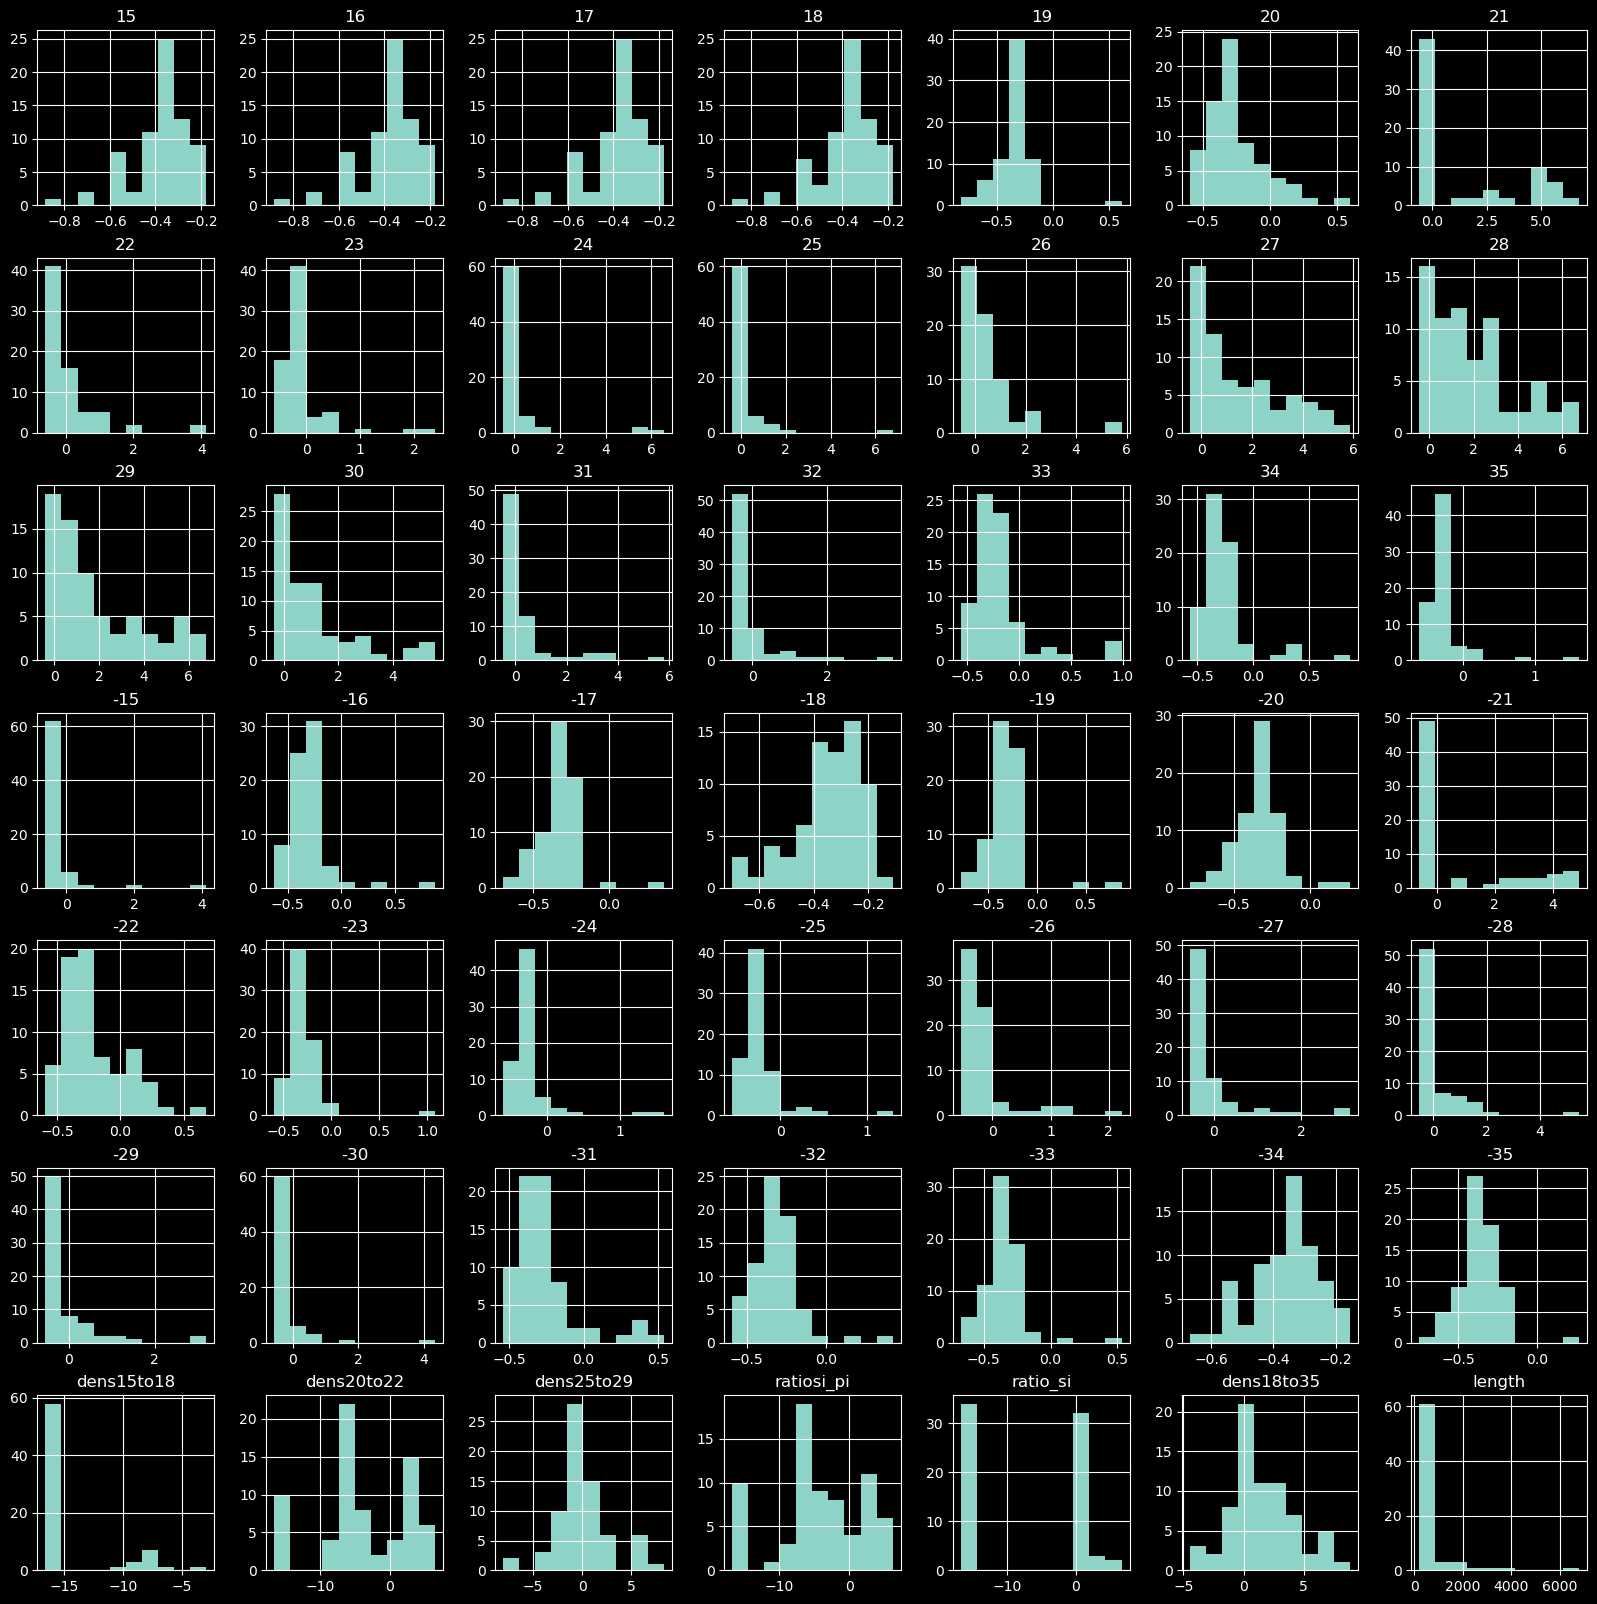

In [41]:
X.hist(figsize=(20, 20))
plt.show()

#### Histograms: Feature value distributions per classes

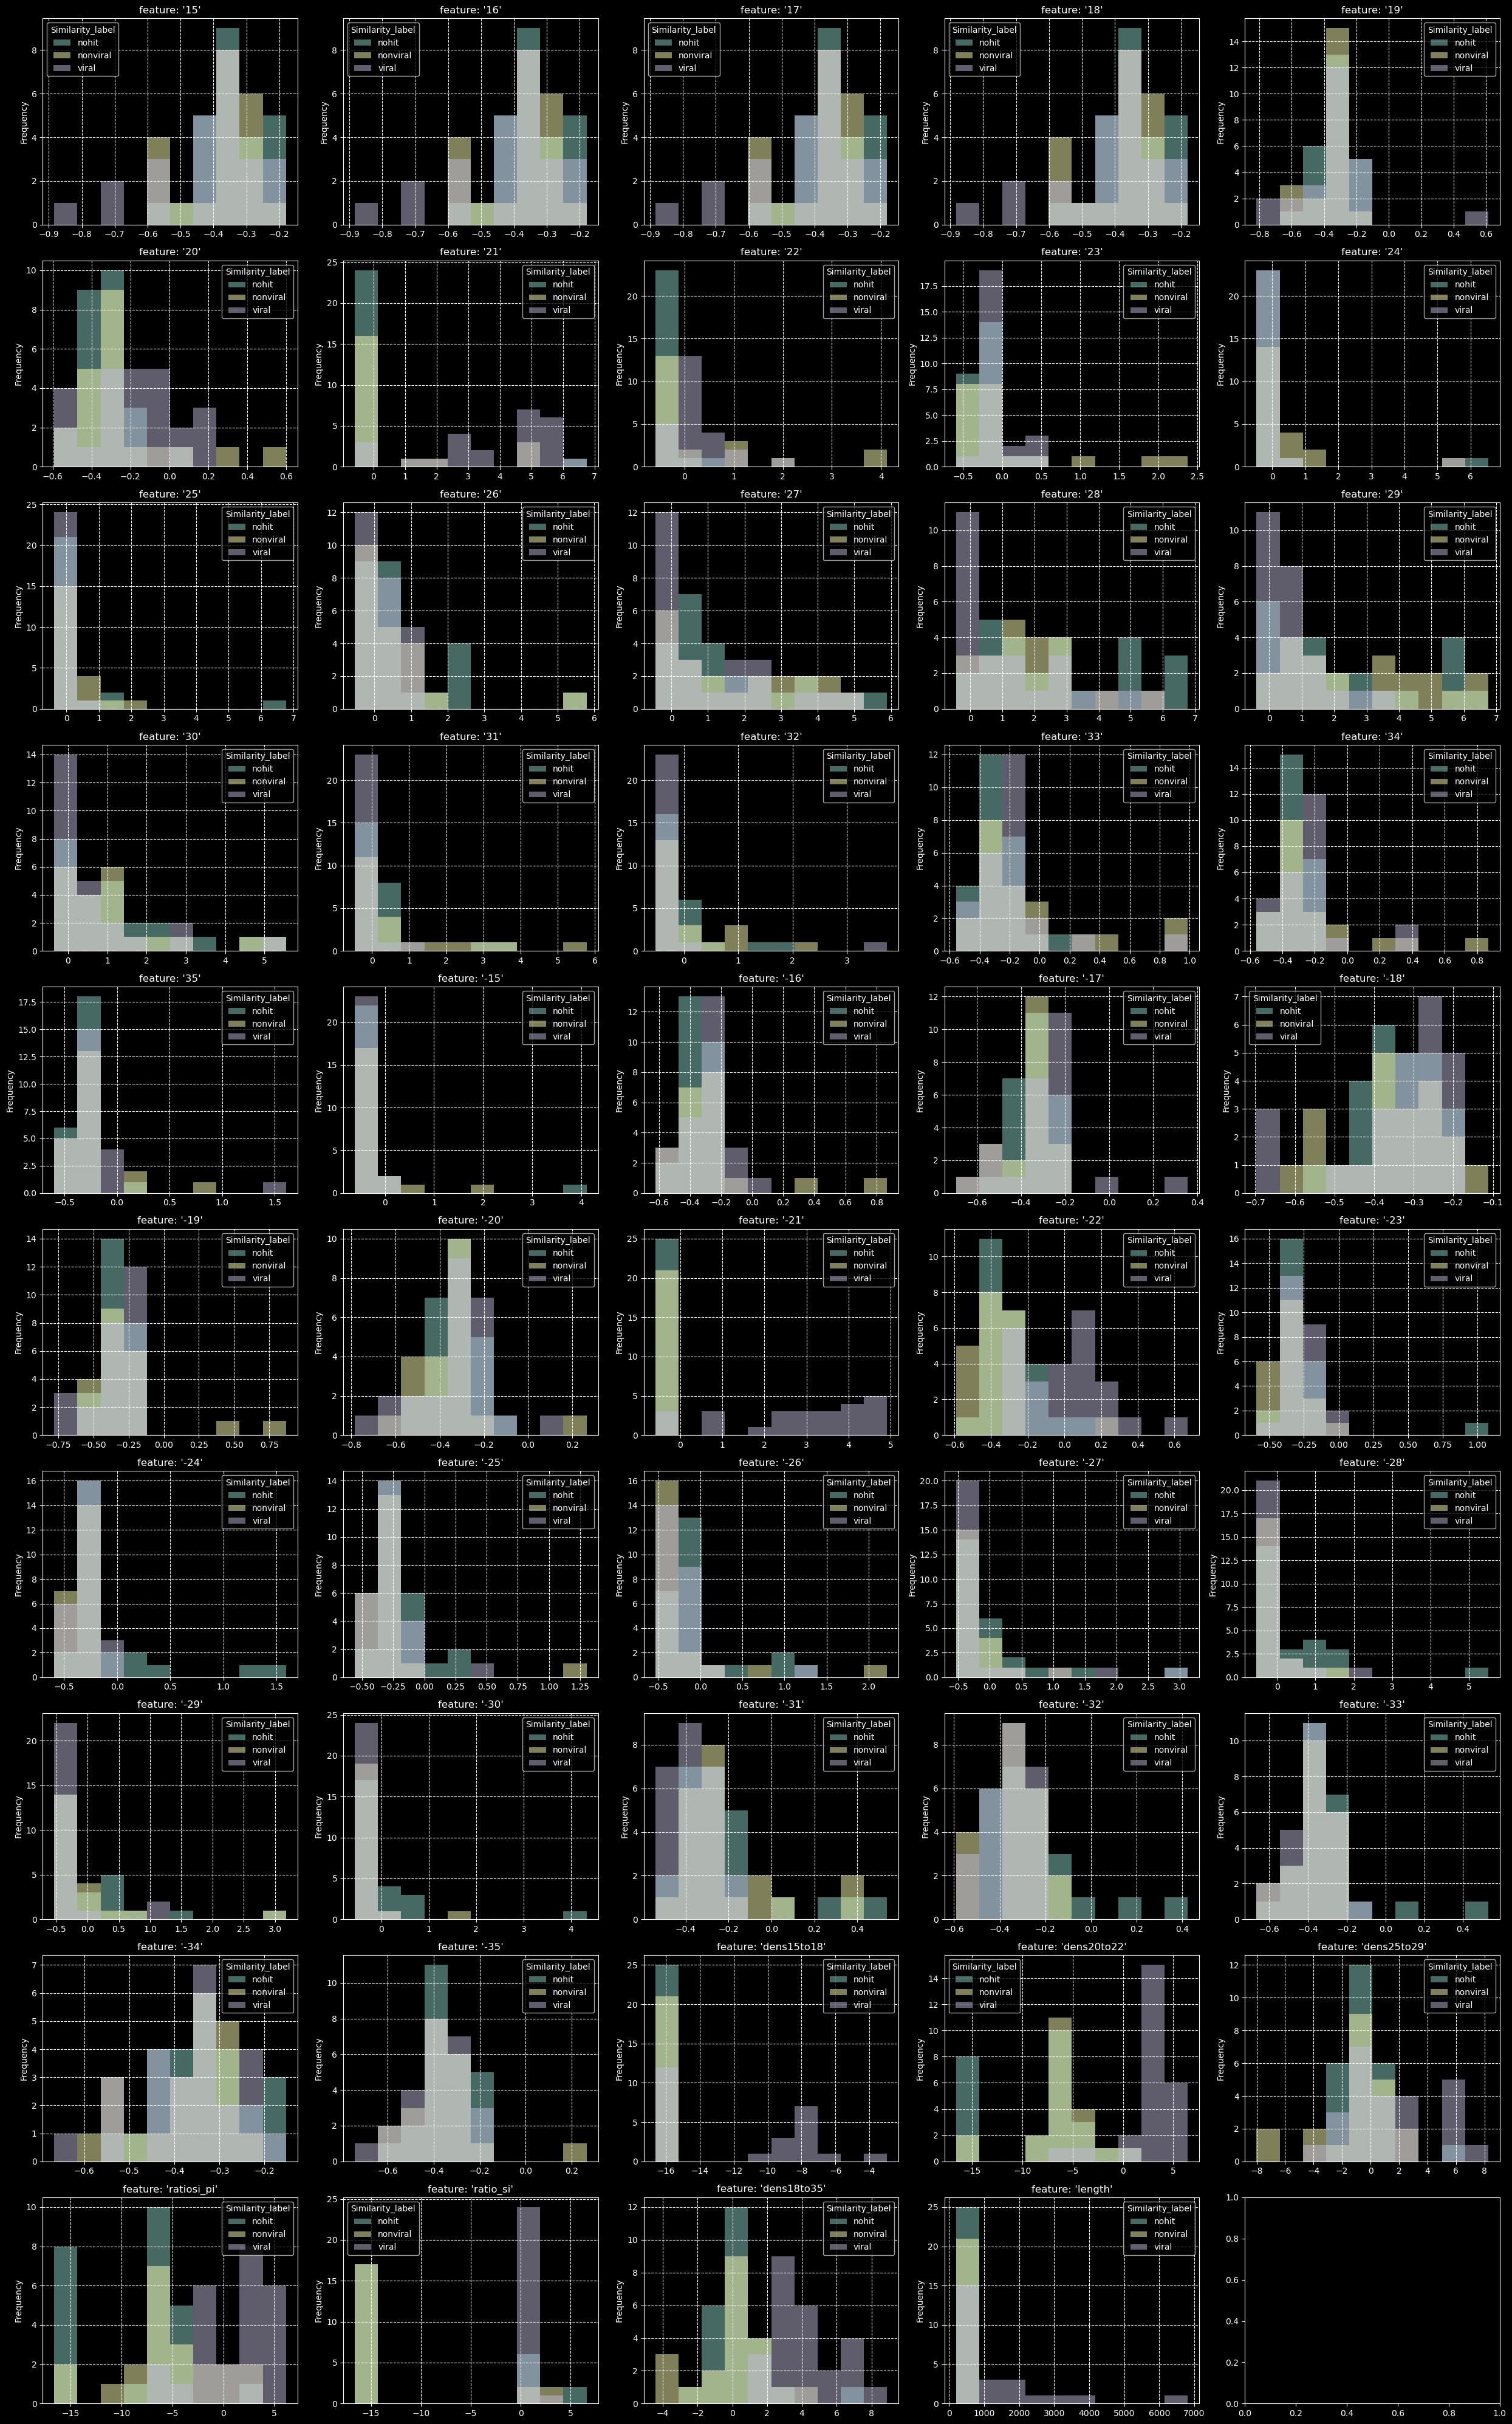

In [90]:

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(25, 40))

for i, ax in enumerate(axes.flatten()):

    if i >= n_features:
        break

    feature = X.columns[i]
    df_virus_dark_matter.pivot(columns=y_column, values=feature).plot.hist(ax=ax, alpha=0.5)
    ax.set_title(f"feature: '{feature}'")
    # ax.set_xlabel(feature, fontdict={'fontsize': 15})
    # ax.set_xlabel(feature)
    ax.grid(linestyle="--")

plt.tight_layout() # Adjust spacing between subplots
plt.show()


#### Classes Balance

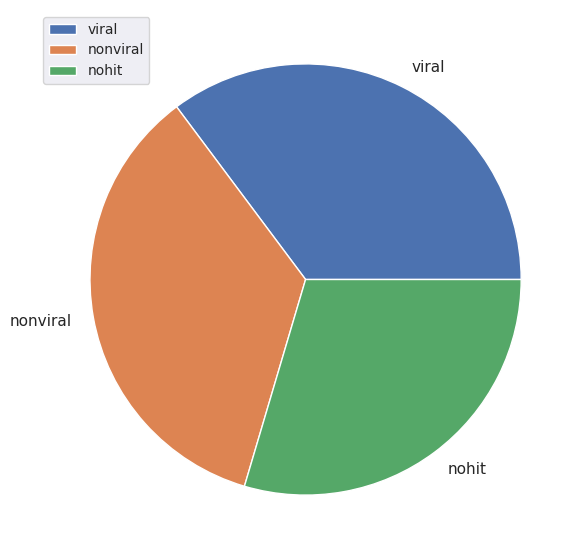

In [205]:
plt.figure(figsize=(7, 7))
plt.pie(class_counts, labels=classes)
plt.legend(loc=2, prop={'size': 10})
plt.show()


## Training

Imports

In [111]:
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import classification_report, confusion_matrix

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import PCA
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import (
#     ConfusionMatrixDisplay,
#     accuracy_score, 
#     recall_score, 
#     precision_score,
#     confusion_matrix, 
#     roc_auc_score,
#     roc_curve
#     )
# from sklearn.metrics import RocCurveDisplay, DetCurveDisplay

# #Bibliotecas para avaliação e seleção dos modelos
# from sklearn.model_selection import GridSearchCV

#### Train × Test split

In [206]:
from sklearn.model_selection import train_test_split

Parameters

In [207]:
test_size = 0.3

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

print(f'X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}')


X_train.shape: (49, 49), X_test.shape: (22, 49)
y_train.shape: (49,), y_test.shape: (22,)


### 01: Unsupervised _(clustering)_

#### 1.1: t-SNE _(t-Distributed Stochastic Neighbor Embedding)_

In [209]:
from sklearn.manifold import TSNE

t-SNE test Parameters

In [210]:
tsne_test_params = {
    'n_components': [2, 3],
    'perplexity': [5, 10, 20, 30],
}

##### Train

In [238]:
tsne_list = []

for c in tsne_test_params.get('n_components'):
    for p in tsne_test_params.get('perplexity'):
        print(f'Running t-SNE for {c} components and perplexity == "{p}"')
        tsne = TSNE(n_components=c, perplexity=p, random_state=random_state, verbose=is_verbose)
        X_tsne = tsne.fit_transform(X)
        tsne_list.append( (X_tsne, p) )

Running t-SNE for 2 components and perplexity == "5"
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 71 samples in 0.000s...
[t-SNE] Computed neighbors for 71 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 71 / 71
[t-SNE] Mean sigma: 11.153176


/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.050568
[t-SNE] KL divergence after 1000 iterations: 0.454709
Running t-SNE for 2 components and perplexity == "10"
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 71 samples in 0.000s...
[t-SNE] Computed neighbors for 71 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 71 / 71
[t-SNE] Mean sigma: 15.409820
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.577759


/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 1000 iterations: 0.147866
Running t-SNE for 2 components and perplexity == "20"
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 71 samples in 0.000s...
[t-SNE] Computed neighbors for 71 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 71 / 71
[t-SNE] Mean sigma: 23.619482
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.391106


/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 1000 iterations: 0.138195
Running t-SNE for 2 components and perplexity == "30"
[t-SNE] Computing 70 nearest neighbors...
[t-SNE] Indexed 71 samples in 0.000s...
[t-SNE] Computed neighbors for 71 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 71 / 71
[t-SNE] Mean sigma: 33.755646


/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.610485
[t-SNE] KL divergence after 1000 iterations: 0.213359
Running t-SNE for 3 components and perplexity == "5"
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 71 samples in 0.000s...
[t-SNE] Computed neighbors for 71 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 71 / 71
[t-SNE] Mean sigma: 11.153176


/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 113.000023
[t-SNE] KL divergence after 1000 iterations: 4.073886
Running t-SNE for 3 components and perplexity == "10"
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 71 samples in 0.000s...
[t-SNE] Computed neighbors for 71 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 71 / 71
[t-SNE] Mean sigma: 15.409820


/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.895325
[t-SNE] KL divergence after 1000 iterations: 2.943728
Running t-SNE for 3 components and perplexity == "20"
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 71 samples in 0.000s...
[t-SNE] Computed neighbors for 71 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 71 / 71
[t-SNE] Mean sigma: 23.619482
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.407333


/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 1000 iterations: 2.242434
Running t-SNE for 3 components and perplexity == "30"
[t-SNE] Computing 70 nearest neighbors...
[t-SNE] Indexed 71 samples in 0.000s...
[t-SNE] Computed neighbors for 71 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 71 / 71
[t-SNE] Mean sigma: 33.755646


/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.387260
[t-SNE] KL divergence after 1000 iterations: 1.682753


##### Plots

Plotters

In [243]:
def plot_tsne_2(X_tsne: np.array, y: np.array, perplexity: int):

    df_aux = pd.DataFrame()
    df_aux["y"] = y
    df_aux["tSNE-1"] = X_tsne[:, 0]
    df_aux["tSNE-2"] = X_tsne[:, 1]

    plt.figure()

    sns.set(rc={'figure.figsize':(8, 6)})
    sns.scatterplot(
        x="tSNE-1", y="tSNE-2",
        data=df_aux,
        hue=df_aux.y.tolist(), palette=sns.color_palette("hls", 3),
    ).set(
        title=f"t-SNE - n_components: '2' | perplexity: '{perplexity}'"
    )
    
    plt.show()


def plot_tsne_3(X_tsne: np.array, y: pd.Series, perplexity: int, classes: list):
   
    n_components = X_tsne.shape[1]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    for c in classes:
        
        class_lines = y[y.values == c].index.tolist()
        
        x1 = X_tsne[class_lines, 0]
        x2 = X_tsne[class_lines, 1]
        x3 = X_tsne[class_lines, 2]

        # ax.scatter(x, y, z, label=c, c=class_colors.get(y[i]), s=100)
        # ax.scatter(x1, x2, x3, label=c, s=100)
        ax.scatter(x1, x2, x3, label=c)

        ax.set_title(f"t-SNE - n_components: '{n_components}' | perplexity: '{perplexity}'")
        ax.grid(linestyle="--")

    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_zlabel('t-SNE 3')
    ax.legend()
    
    plt.show()


def plot_tsne(X_tsne: np.array, y: pd.Series, perplexity: int, classes: list):
    n_components = X_tsne.shape[1]
    
    if n_components == 2:
        plot_tsne_2(X_tsne=X_tsne, y=y, perplexity=perplexity)
    elif n_components == 3:
        plot_tsne_3(X_tsne=X_tsne, y=y, perplexity=perplexity, classes=classes)

Plot

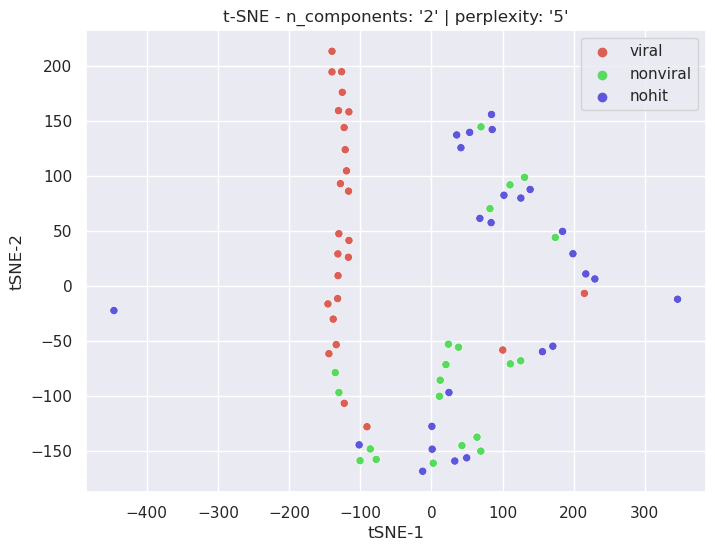

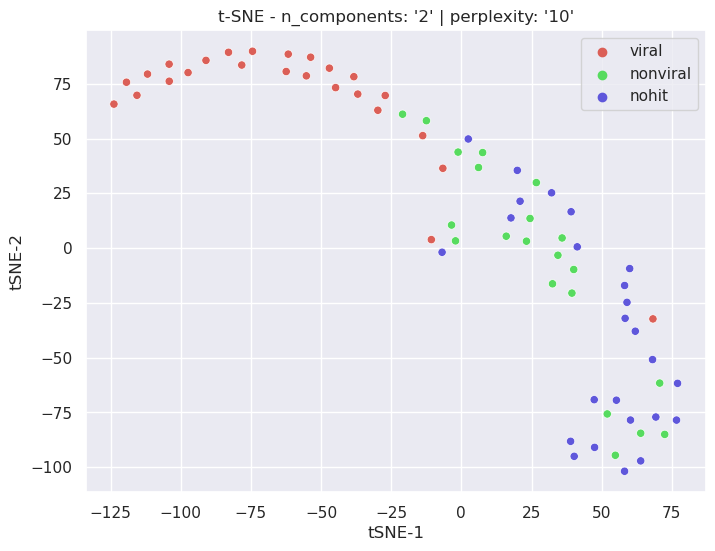

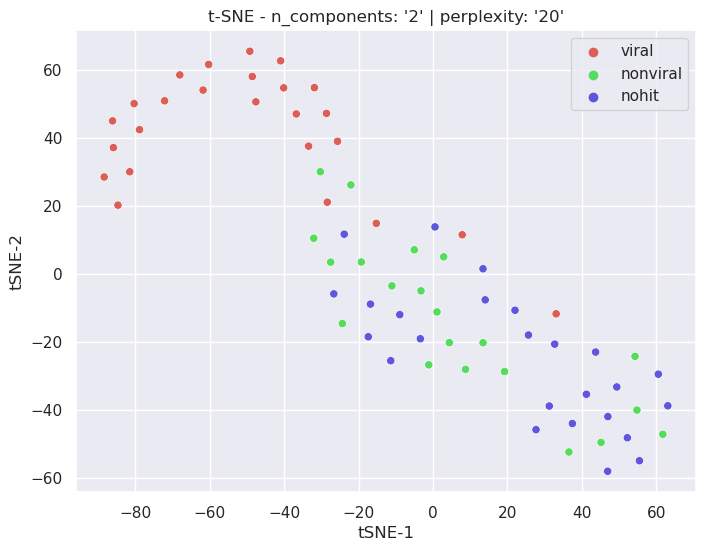

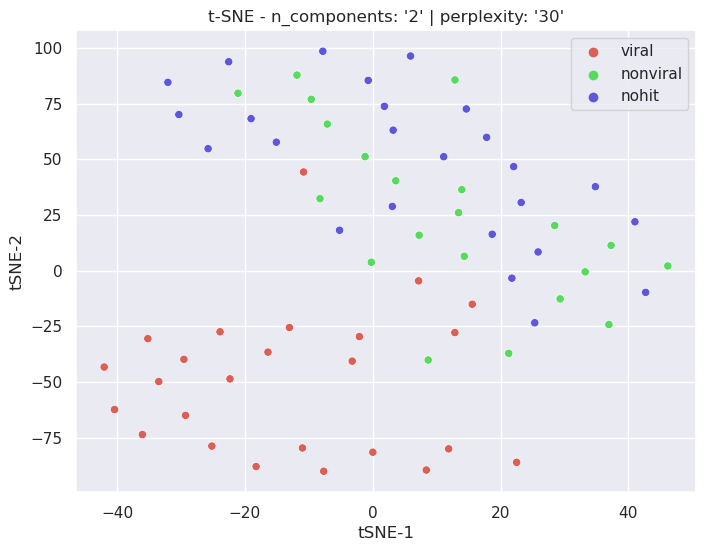

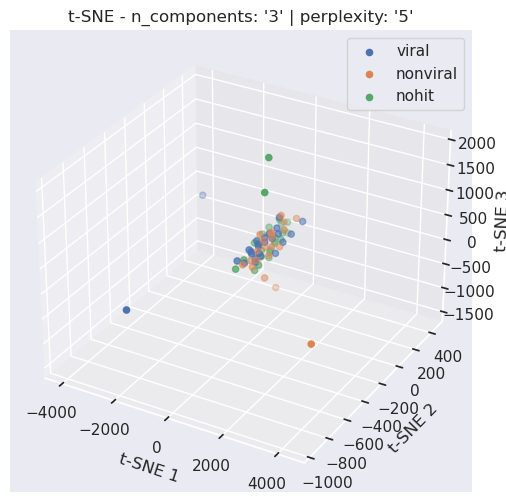

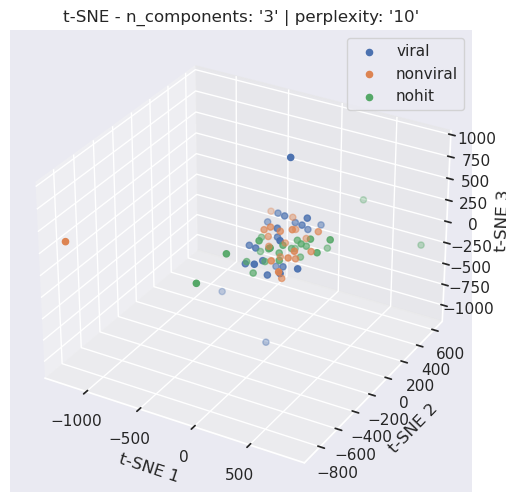

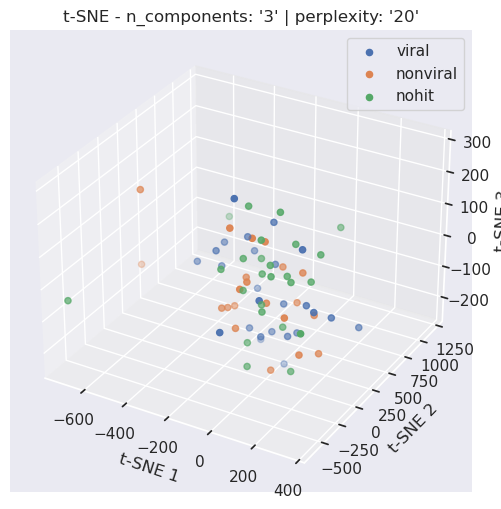

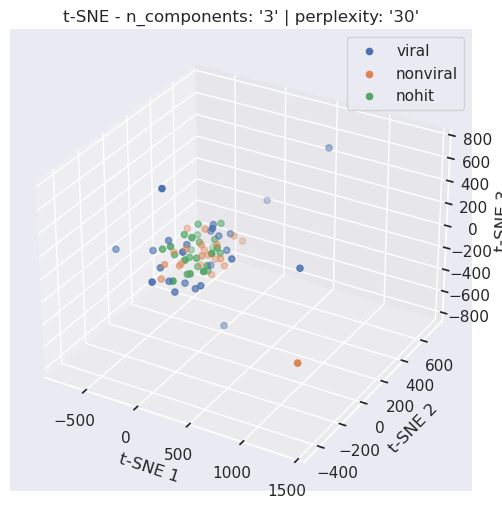

In [244]:

for tsne in tsne_list:
    X_tsne, perplexity = tsne
    plot_tsne(X_tsne=X_tsne, y=y, perplexity=perplexity, classes=classes)